In [78]:
import os
import csv
import pickle
import numpy as np
import pandas as pd
import warnings
import pprint as pp
warnings.filterwarnings(action='ignore')

import nltk
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from wordcloud import WordCloud
from gensim import corpora, models
from gensim.models import LdaMulticore
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from gensim.models.callbacks import CoherenceMetric
import gensim

from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from bokeh.io import push_notebook, show, output_notebook, save, output_file
from bokeh.layouts import row
from bokeh.plotting import figure
from bokeh.palettes import RdBu
from bokeh.models import HoverTool, ColumnDataSource
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
output_notebook()

import pyLDAvis
import pyLDAvis.gensim
import pickle

from pkg import nlpfunc

random_state = 2023




Loading BokehJS ...

# Load Data

In [3]:
with open('../data/dongjack_article.pkl', 'rb') as f:
    Gu1_articles = pickle.load(f)
    
with open('../data/yeongdeungpo_article.pkl', 'rb') as f:
    Gu2_articles = pickle.load(f)

In [7]:
print(len(Gu1_articles))
print(len(Gu2_articles))

60
160


In [8]:

print(Gu1_articles[:5]) 
print(Gu2_articles[:5]) 

[' 3·5구역 교육환경영향평가 통과노량진 학원가 일대 전경.[아시아경제 최동현 기자] 서울 동작구 노량진뉴타운 일대 재개발 사업이 속도를 내고있다.7일 업계에 따르면 노량진3구역과 5구역은 최근 사업시행인가 직전 마지막 관문으로 평가받는 교육환경영향평가를 통과했다. 교육환경영향평가란 정비사업을 진행할 때 단지 신설로 인한 학생수 변화, 학교 환경, 안전 등 교육환경 전반에 미치는 영향을 평가하는 심의다.1012가구 규모로 재개발 될 예정인 3구역은 2019년 이미 사업시행인가 신청서를 동작구청에 제출했다. 3구역은 대단지인 데다 지하철 1ㆍ9호선이 지나는 노량진역과 인접한 초역세권으로 노량진 뉴타운 중에서도 핵심 입지로 평가받는다. 3구역 조합 관계자는 "연초 사업시행인가를 받고 올해 시공사 선정도 충분히 가능할 것으로 본다"고 말했다.727가구 규모로 건립되는 5구역도 교육환경영향평가의 첫 심의를 무난히 통과했다. 이미 지난해 사업시행인가 신청서를 제출한 상황이라 조만간 인가가 날 것으로 예상된다. 동작구청 관계자는 "교육청으로부터 정식 공문이 오면 관련 자료 등을 검토해 3ㆍ5구역의 사업인가 여부를 최종 판단할 계획"이라고 말했다.노량진뉴타운은 노량진ㆍ대방동 일대 73만8000㎡ 규모로, 총 8개 구역에 걸쳐 9116가구의 아파트가 들어서게 된다. 2003년 서울시 2차 뉴타운지구로 지정됐지만 아직 사업이 완료된 곳은 없다. 그동안 수산물시장과 고시촌, 학원가 등의 이해관계가 첨예하게 얽혀 있었기 때문이다. 하지만 서부선경전철 등 교통호재에 힘입어 최근 사업이 급물살을 타고있다. 현재 사업 속도가 가장 빠른 6구역은 연초 관리처분계획인가가 날 것으로 예상된다. 2구역 역시 지난해 말 관리처분인가 신청서를 제출한 상태다. 4ㆍ7ㆍ8구역은 시공사 선정을 마치고 관리처분 인가 제출을 서두르고 있다.8구역 114㎡(전용면적) 입주권 매물은 권리가액이 7억5000만원이지만 현재 시세가 17억원에 이른다. 이지역 A공인중개사사무소 관계자는 "여의도나 강남권 업무지구

# Preprocessing

### Remove stop words

In [9]:

with open('../data/korean_stopwords.txt', 'r', encoding='utf-8') as f:
    stopwords = f.readlines()
stopwords = [x.replace('\n','') for x in stopwords]
addtional = ['기자', '이데일리', '뉴시스','언론','언론사', '도시', '주택', '계획', '사업',
             '일대', '지역', '추진','주민','시설', '구역', '가구','고','위','층',
             '말']
stopwords = stopwords + addtional

In [10]:
## remove stopwords
case1 = ['동작', '동작구', '서울', '서울시']
stopwords_Gu1 = stopwords + case1


case2 = ['영등포', '영등포구', '서울', '서울시']
stopwords_Gu2 = stopwords + case2


In [11]:
## extract nouns
_, word_list1 = nlpfunc.analyze_morph_extract_noun(Gu1_articles, stopwords_Gu1)
_, word_list2 = nlpfunc.analyze_morph_extract_noun(Gu2_articles, stopwords_Gu2)


### 추가 Stop word 생성을 위한 빈도수 확인

In [12]:
def check_count_pos(model_name, pos):
    text = nltk.Text(pos, name = 'NMSC')
    print ('모델명: {}'.format(model_name))
    print ("토큰의 개수 : {}".format(len(text.tokens)))
    print ("unique 토큰의 개수 : {}".format(len(set(text.tokens))))
    print("상위 50개 빈도의 단어 : ")
    pp.pprint(text.vocab().most_common(20))
    
    print("Plot Chart")
    
    plt.figure(figsize = (20, 10))
    plt.rcParams.update({'font.size':20})
    text.plot(50)

모델명: 동작구
토큰의 개수 : 9095
unique 토큰의 개수 : 2215
상위 50개 빈도의 단어 : 
[('청년', 72),
 ('조성', 61),
 ('마을', 55),
 ('통해', 53),
 ('도시재생', 52),
 ('공간', 51),
 ('상도', 51),
 ('센터', 49),
 ('안전', 47),
 ('위해', 47),
 ('분양', 45),
 ('제공', 45),
 ('건축', 44),
 ('지원', 44),
 ('대상', 44),
 ('선정', 42),
 ('개', 41),
 ('노량진', 38),
 ('예정', 36),
 ('흑석', 36)]
Plot Chart


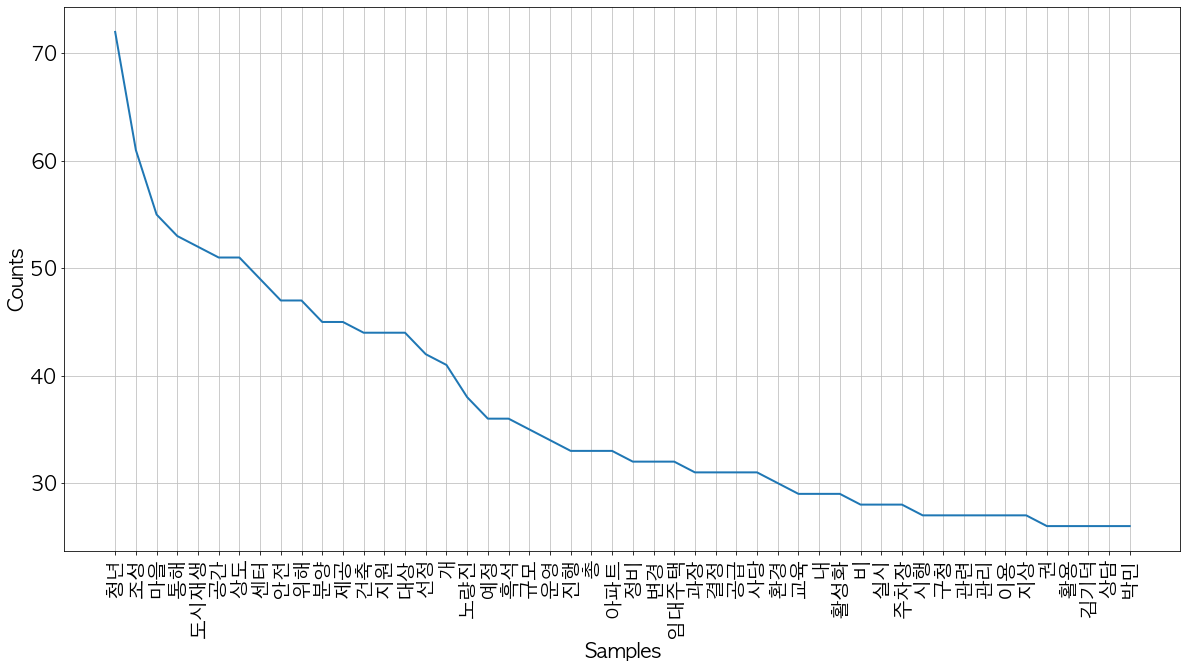

In [13]:
# 동작구 단어 빈도 확인
check_count_pos('동작구',word_list1)

In [14]:
# stopword 추가
case1_add = ['개', '총', '내', '권', '비', '박민', '통해', '위해']
stopwords_Gu1 = stopwords_Gu1 + case1_add

모델명: 영등포구
토큰의 개수 : 29381
unique 토큰의 개수 : 4725
상위 50개 빈도의 단어 : 
[('정비', 300),
 ('문화', 193),
 ('도시재생', 193),
 ('공간', 184),
 ('조성', 161),
 ('지원', 145),
 ('예정', 144),
 ('위해', 143),
 ('환경', 142),
 ('선정', 140),
 ('청장', 132),
 ('통해', 132),
 ('내', 130),
 ('개발', 128),
 ('시장', 126),
 ('활성화', 124),
 ('경제', 121),
 ('아파트', 120),
 ('개선', 119),
 ('도심', 118)]
Plot Chart


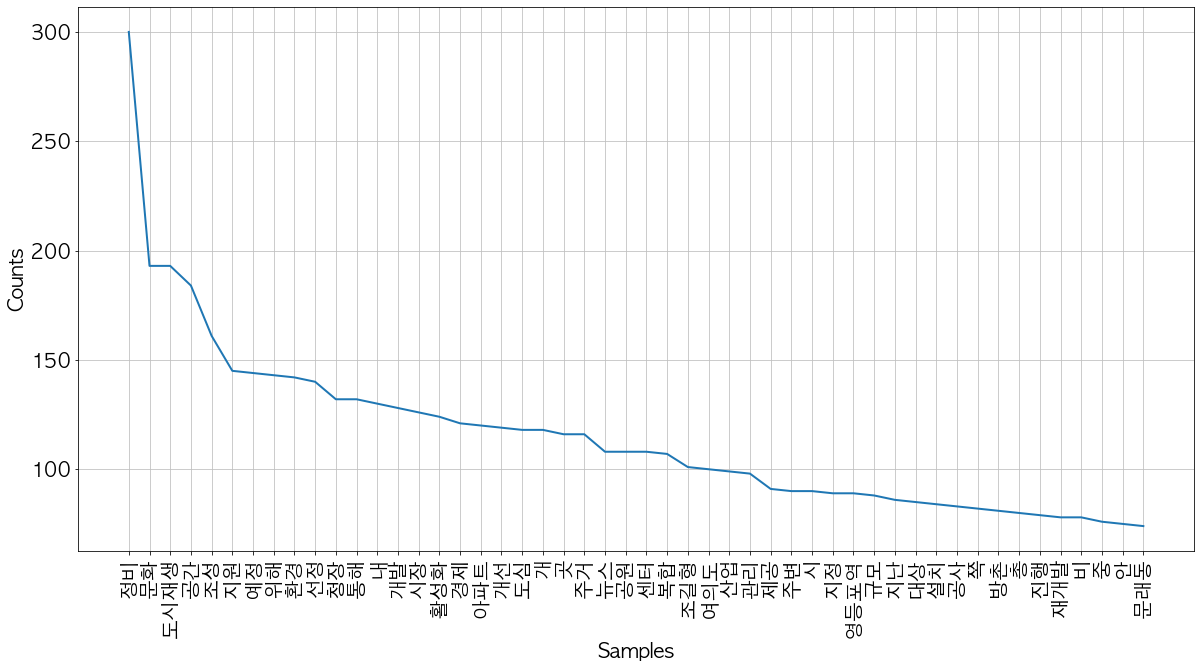

In [15]:
## 영등포구 단어 빈도 확인
check_count_pos('영등포구',word_list2)

In [16]:
# stopword 추가
case2_add = ['개', '총', '내', '권', '비', '박민', '곳', '시', '비', '중', '안', '쪽', '위해', '통해', '청장']
stopwords_Gu2 = stopwords_Gu2 + case2_add

# Analysis

## Wordcloud 



In [17]:
def make_wordcloud(word_dict, mask, cloud_set):
    wordcloud = WordCloud(
    font_path=cloud_set['font_path'],
    background_color = cloud_set['background_color'],
    colormap =cloud_set['colormap'],
    width=cloud_set['width'],
    height=cloud_set['height'],
    mask=cloud_set['mask']
    )

    wordcloud_words = wordcloud.generate_from_frequencies(word_dict)

    array = wordcloud.to_array()
    
    fit = plt.figure()
    plt.imshow(array, interpolation='bilinear')
    plt.axis('off')
    #plt.title('Word Cloud of Real Estate Articles')
    plt.show()

In [ ]:
## extract nouns
word_dict1, _ = nlpfunc.analyze_morph_extract_noun(Gu1_articles, stopwords_Gu1)
word_dict2, _ = nlpfunc.analyze_morph_extract_noun(Gu2_articles, stopwords_Gu2)

### 동작구

In [ ]:
mask_img_name = 'wordcloud_mask1.png'
mask = np.array(Image.open(os.path.join('../img', mask_img_name)))

In [ ]:
wordcloud = WordCloud()
## Word cloud
mask_img_name = 'wordcloud_mask2.png'
mask = np.array(Image.open(os.path.join('../img', mask_img_name)))

cloud_set = {'font_path': '..font/NanumGothicBold.otf',
             'background_color': 'White',
             'colormap': 'twilight',
             'width': 800,
             'height': 600,
             'mask': mask}
make_wordcloud(word_dict1, mask, cloud_set)

### 영등포구

In [ ]:
wordcloud = WordCloud()
## Word cloud
mask_img_name = 'wordcloud_mask2.png'
mask = np.array(Image.open(os.path.join('../img', mask_img_name)))

cloud_set = {'font_path':'..font/NanumGothicBold.otf',
              'background_color':'White',
              'colormap':'twilight',
              'width': 800,
              'height':600,
              'mask':mask}
make_wordcloud(word_dict2, mask, cloud_set )


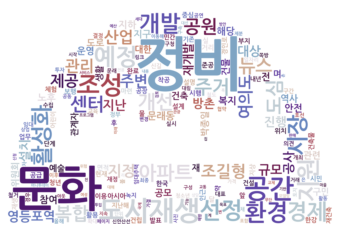

In [32]:
wordcloud = WordCloud()
## Word cloud
mask_img_name = 'wordcloud_mask2.png'
mask = np.array(Image.open(os.path.join('../img', mask_img_name)))

cloud_set = {'font_path':'..font/NanumGothicBold.otf',
              'background_color':'White',
              'colormap':'twilight',
              'width': 800,
              'height':600,
              'mask':mask}
make_wordcloud(word_dict2, mask, cloud_set )


## 유사한 단어 군집을 통해 이슈 분류

- Embedding: Word2Vec, 단어를 벡터로 바꿔준다. 단어를 벡터화 할 때 단어의 문맥적 의미를 보존할 수 있다
- 단어 간의 관계를 파악하는 Word Embedding을 이용하여 유사한 단어를 파악할 수 있다
- Tsne를 통해 비슷한 단어를 한 눈에 볼 수 있도록 시각화 한다

* 주요품사
    - NNG:	일반 명사
    - NNP:	고유 명사
    - VV:	동사
    - VA:	형용사
    - XR:	어근
    - SL:	알파벳(A-Z a-z)

In [28]:
n_word = ['NNG', 'NNP', 'VV', 'VA', 'XR', 'SL']
v_word = ['VV', 'VA']

### Word Embedding

In [23]:
from kiwipiepy import Kiwi
from kiwipiepy.utils import Stopwords
kiwi = Kiwi()

In [24]:
# stopword에 추가할 단어 포맷 변경
total_article_list = []
total_stop_words = stopwords_Gu1 + stopwords_Gu2
add_stopwords = []
for temp in [kiwi.tokenize(x) for x in total_stop_words]:
    add_stopwords.extend([(x.form, x.tag) for x in temp if ('-I' not in x.tag) and ('-R' not in x.tag)])
    

In [25]:

kiwi_stopwords = Stopwords()
kiwi_stopwords.add(set(add_stopwords))

In [26]:
def make_sentence_list(setences, stopwords):
    sentences_list = []
    morph_list = [kiwi.tokenize(x, normalize_coda=True, stopwords=stopwords) for x in setences]
    for morph in morph_list:
        filter_w = [m for m in morph if m.tag in n_word ]
        filter_w = [m.form+'다' if m.tag in v_word else m.form for m in filter_w]
        sentences_list.append(filter_w)
    return sentences_list
        

#### 동작구

In [29]:
sentences_list1 = make_sentence_list(Gu1_articles, kiwi_stopwords)
sentences_list1[0][:10]



['교육', '환경', '영향', '평가', '통과', '노량진', '학원가', '일대', '전경', '아시아']

In [30]:
emb_1 = Word2Vec(sentences_list1, vector_size = 1000,
                 window = 3, min_count = 5, workers = 4,
                 epochs = 1000, sg = 1)

In [31]:
emb_1.wv.index_to_key[:10]

['청년', '조성', '재생', '안전', '마을', '밝히다', '공간', '건축', '동', '지원']

In [32]:
emb_1.wv.most_similar('평가')

[('영향', 0.4421446621417999),
 ('심의', 0.35109519958496094),
 ('과정', 0.3508889675140381),
 ('아시아', 0.29583078622817993),
 ('전주', 0.2944321930408478),
 ('열람', 0.28793466091156006),
 ('속도', 0.2872171401977539),
 ('제출', 0.28683722019195557),
 ('강남', 0.2817912995815277),
 ('조사', 0.28132718801498413)]

In [33]:
emb_1.wv.most_similar('상승세')

[('집값', 0.5986903309822083),
 ('규제', 0.5168193578720093),
 ('보이다', 0.5138095617294312),
 ('강남', 0.4898085296154022),
 ('전주', 0.4879952073097229),
 ('커지다', 0.47857335209846497),
 ('이어지다', 0.465284526348114),
 ('앞두다', 0.4642541706562042),
 ('택지', 0.4590553343296051),
 ('영향', 0.4380476176738739)]

#### 영등포구

In [34]:
sentences_list2 = make_sentence_list(Gu2_articles, kiwi_stopwords)
sentences_list2[0][:10]


['이승주', '타임스퀘어', '인근', '규모', '관광', '호텔', '들어서다', '영등포동', '가', '번지']

In [35]:
emb_2 = Word2Vec(sentences_list2, vector_size = 1000,
                 window = 3, min_count = 5, workers = 4,
                 epochs = 1000, sg = 1)

In [36]:
emb_2.wv.index_to_key[:10]

['정비', '재생', '개발', '공간', '문화', '조성', '일대', '환경', '지원', '예정']

In [37]:
emb_2.wv.most_similar('개발')

[('집값', 0.29140639305114746),
 ('지적', 0.2438473105430603),
 ('플랜', 0.2418706864118576),
 ('신길역', 0.23906216025352478),
 ('당초', 0.23352110385894775),
 ('토착', 0.2304890751838684),
 ('장기', 0.22881464660167694),
 ('지구', 0.219985693693161),
 ('혼합', 0.21708814799785614),
 ('편입', 0.21478770673274994)]

### Tsne 시각화

In [49]:
def make_embedded_frame(embeddinng_model, print_head=True):
    emd_list = []
    for k in embeddinng_model.wv.index_to_key:
        emd_list.append(embeddinng_model.wv[k])
    emd_frame = pd.DataFrame(emd_list, index=embeddinng_model.wv.index_to_key)
    if print_head:
        print(emd_frame.head())
    return emd_frame

In [50]:
def create_tsne_frame(embedded_frame,print_head=True):
    tsne = TSNE(random_state=random_state, n_components=2, 
               perplexity=10,
               learning_rate=0.1,
               early_exaggeration=5)
    tsne_point = tsne.fit_transform(embedded_frame.values)
    tsne_df = pd.DataFrame(tsne_point, index=embedded_frame.index,
                          columns=['x_coord', 'y_coord'])
    tsne_df['word'] = embedded_frame.index
    if print_head:
        print(tsne_df.head())
    return tsne_df

#### 동작구

In [51]:
emd_frame1 = make_embedded_frame(emb_1)

         0         1         2         3         4         5         6    \
청년  0.058252 -0.068833  0.014789  0.095542 -0.153259  0.085201  0.024563   
조성  0.069335  0.133024  0.117530 -0.278123  0.021693 -0.018050 -0.104643   
재생  0.023476  0.042076  0.065620 -0.129943  0.226364  0.093001 -0.067650   
안전  0.024495  0.168306  0.001955  0.117885 -0.094240  0.014509  0.152569   
마을 -0.280042  0.005286 -0.120956 -0.346832 -0.032857 -0.062175 -0.011154   

         7         8         9    ...       990       991       992       993  \
청년  0.155368 -0.019128 -0.035170  ... -0.207477  0.057648  0.250269  0.061491   
조성  0.100268 -0.060819  0.039825  ...  0.047786 -0.013193 -0.008080  0.072883   
재생 -0.164959  0.341099  0.196124  ... -0.047712  0.071065 -0.083820 -0.173442   
안전  0.022670 -0.060304  0.189860  ...  0.062829 -0.113019 -0.164044 -0.042577   
마을 -0.010796  0.110865  0.096309  ...  0.114442 -0.166516 -0.058814 -0.209803   

         994       995       996       997       998    

In [52]:
t_df1 = create_tsne_frame(emd_frame1)

     x_coord   y_coord word
청년  3.214462 -2.350290   청년
조성 -0.999310 -4.997361   조성
재생 -1.154630 -4.379227   재생
안전 -4.419866 -3.026614   안전
마을 -3.151322 -5.985423   마을


In [53]:
plot_data = ColumnDataSource(t_df1)
colors = ["#%02x%02x%02x"]

TOOLS="hover,pan,wheel_zoom,zoom_in,\
zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,\
poly_select,lasso_select,"


p = figure(tools = TOOLS, title = '동작구 Real Estate Issues')
p.add_tools(HoverTool(tooltips = '@word'))

p.circle('x_coord', 'y_coord', source = plot_data,
        fill_alpha = 0.1, line_alpha = 0.3, 
        color='red', size = 10)


p.xaxis.visible = False
p.yaxis.visible = False
p.grid.grid_line_color = None
p.outline_line_color = None
show(p)

In [54]:
output_file("../outputs/tsne_dongjak.html")
save(p)

'/Users/jeonsohyun/Library/CloudStorage/OneDrive-숭실대학교-SoongsilUniversity/project/real_estate_issues/outputs/tsne_dongjak.html'

#### 영등포구

In [ ]:
emd_frame2 = make_embedded_frame(emb_2)
t_df2 = create_tsne_frame(emd_frame2)

In [ ]:
plot_data = ColumnDataSource(t_df2)
colors = ["#%02x%02x%02x"]

TOOLS="hover,pan,wheel_zoom,zoom_in,\
zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,\
poly_select,lasso_select,"


p = figure(tools = TOOLS, title = '영등포구 Real Estate Issues')
p.add_tools(HoverTool(tooltips = '@word'))

p.circle('x_coord', 'y_coord', source = plot_data,
        fill_alpha = 0.1, line_alpha = 0.3, 
        color='blue', size = 10)


p.xaxis.visible = False
p.yaxis.visible = False
p.grid.grid_line_color = None
p.outline_line_color = None
show(p)

In [ ]:
output_file("../outputs/tsne_youngdeungpo.html")
save(p)

## LDA
* 숨겨진 (latent) 레이어를 이용하여 컨텐츠의 주제를 파악해 볼 수 있다
* 추출된 주제의 연과된 단어를 시각화를 통해 쉽게 파악할 수 있다

### Make Topics

In [18]:
def make_dict_corpus(token_list):
    cor_dict = corpora.Dictionary(token_list)
    cor_dict.filter_extremes(no_below=5)
    corpus = [cor_dict.doc2bow(text) for text in token_list]
    return cor_dict, corpus

In [19]:
# 최적의 토픽 개수 확인
def compute_coherences_old(corpus, dictionary, sentences, start=2, limit=10, step=2, show=True):
    coherence_values = []

    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=random_state)
        c_model = CoherenceModel(model, texts=sentences, 
                       dictionary=dictionary, coherence='c_v')
        coherence_values.append(c_model.get_coherence())
    
    if show:
        x = range(start, limit, step)
        plt.plot(x, coherence_values)
        plt.xticks(np.arange(0, limit, step))
        plt.xlabel("Num Topics")
        plt.ylabel("Coherence score")
        plt.legend(("coherence_values"), loc='best')
        plt.show()
        
    return coherence_values

In [79]:
# 최적의 토픽 개수 확인
def compute_coherences(corpus, dictionary, sentences, start=2, limit=10, step=2, show=True):
    coherence_values = []
    perplexity_values = []

    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=random_state)
        c_model = CoherenceModel(model, texts=sentences, 
                       dictionary=dictionary, coherence='c_v')
        coherence_values.append(c_model.get_coherence())
        perplexity_values.append(model.log_perplexity(corpus))
        
    
    if show:

        x = range(start, limit, step)
        plt.plot(x, coherence_values)
        plt.xticks(np.arange(0, limit, step))
        plt.xlabel("Num Topics")
        plt.ylabel("Coherence score")
        plt.legend(("coherence_values"), loc='best')
        plt.show()
        
        
        plt.plot(x, perplexity_values)
        plt.xticks(np.arange(0, limit, step))
        plt.xlabel("Num Topics")
        plt.ylabel("Perplexity score")
        plt.legend(("perplexity_values"), loc='best')
        plt.show()
        
        
    return coherence_values

In [20]:
def get_coherence_scores(model, sentences, dictionary):
    #c_v : 응집성 (0~1)
    coherence = CoherenceModel(model=model, 
                                 texts=sentences,
                                 dictionary=dictionary,
                                 coherence='c_v')
    cv_score = coherence.get_coherence()
    print(f'c_v : {cv_score}')

    #u_mass : 일관성, 0에 가까울수록 좋음
    coherence = CoherenceModel(model=model, 
                                 texts=sentences,
                                 dictionary=dictionary,
                                 coherence='u_mass')
    umass_score = coherence.get_coherence()
    print(f'u_mass : {umass_score}')
    
    return cv_score, umass_score

#### 동작구

In [44]:
cor_dict1, corpus1 = make_dict_corpus(sentences_list1)

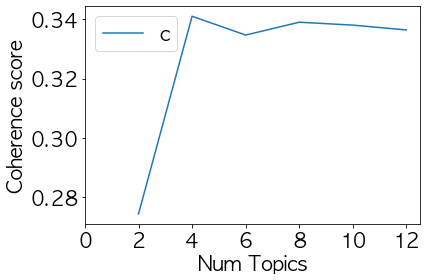

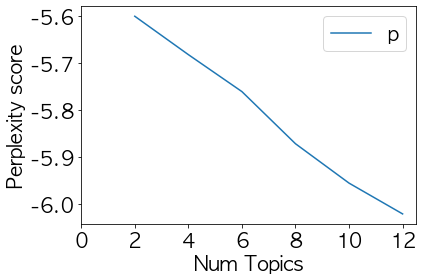

In [80]:
coh_list = compute_coherences(corpus1, cor_dict1, sentences_list1, limit=14)



In [86]:
# LDA 모델 학습
best_n_topic1 = 5
lda_model1 = LdaModel(corpus1, 
                    num_topics = best_n_topic1, 
                    id2word=cor_dict1,
                    random_state=random_state,
                    passes=30)


In [87]:
## score
_, _ = get_coherence_scores(lda_model1, sentences_list1, cor_dict1 )


c_v : 0.4075819078337079
u_mass : -3.226300032199336


#### 영등포구

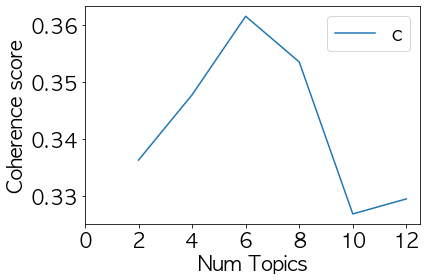

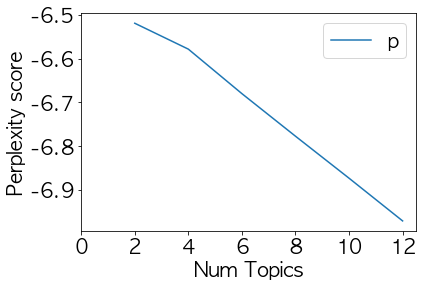

In [81]:
cor_dict2, corpus2 = make_dict_corpus(sentences_list2)
coh_list2 = compute_coherences(corpus2, cor_dict2, sentences_list2, limit=14)

In [60]:
best_n_topic2 = 6
lda_model2 = LdaModel(corpus2, 
                    num_topics = best_n_topic2, 
                    id2word=cor_dict2,
                    random_state=random_state,
                    passes=30)

In [61]:
_, _ = get_coherence_scores(lda_model2, sentences_list2, cor_dict2 )

c_v : 0.4093162782366003
u_mass : -2.75857508574736


### Visualize Topics

#### 동작구

In [85]:
ldavis1= pyLDAvis.gensim.prepare(topic_model = lda_model1,
                               corpus = corpus1, 
                               dictionary = cor_dict1)
pyLDAvis.display(ldavis1)

In [63]:
pyLDAvis.save_html(ldavis1, '../outputs/lda_visualize_dongjak.html')

#### 영등포구

In [64]:
ldavis2= pyLDAvis.gensim.prepare(topic_model = lda_model2,
                               corpus = corpus2, 
                               dictionary = cor_dict2)
pyLDAvis.display(ldavis2)

In [65]:
pyLDAvis.save_html(ldavis2, '../outputs/lda_visualize_youngdeungpo.html')